In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


In [2]:
import pandas as pd

# Loading the dataset with 'ISO-8859-1' encoding
data = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
data.head()



,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
# Check the structure of the dataset
num_rows, num_columns = data.shape

num_rows, num_columns


(953, 24)

In [4]:
# Check for missing values
missing_values = data.isnull().sum()

missing_values[missing_values > 0]


in_shazam_charts    50
key                 95
dtype: int64

In [5]:
# Get basic statistics of the numerical columns
basic_statistics = data.describe()

basic_statistics


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


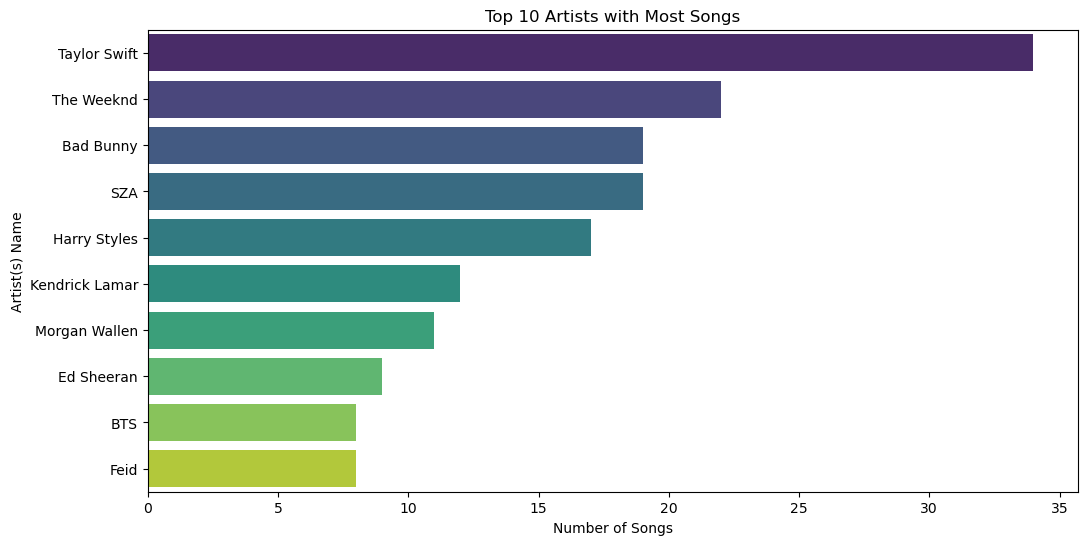

Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: artist(s)_name, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 artists with most songs in the dataset
top_artists = data['artist(s)_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.xlabel('Number of Songs')
plt.ylabel('Artist(s) Name')
plt.title('Top 10 Artists with Most Songs')
plt.show()

top_artists


**Here are the top 10 artists with the most songs in the dataset:**

* Taylor Swift: 34 songs
* The Weeknd: 22 songs
* Bad Bunny: 19 songs
* SZA: 19 songs
* Harry Styles: 17 songs
* Kendrick Lamar: 12 songs
* Morgan Wallen: 11 songs
* Ed Sheeran: 9 songs
* BTS: 8 songs
* Feid: 8 songs

In [7]:
# Check data types of all columns
data.dtypes


track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [8]:
# Remove non-numeric values from 'streams' column and convert to integer
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Check data types again
data.dtypes


track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

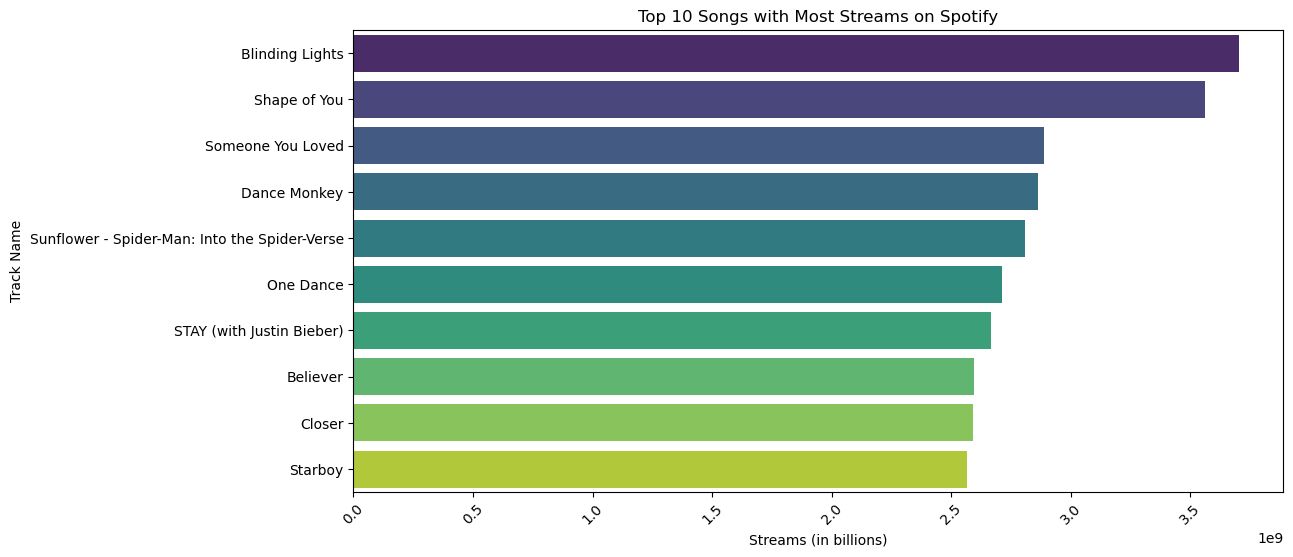

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09
162,One Dance,"Drake, WizKid, Kyla",2.713922e+09
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09
140,Believer,Imagine Dragons,2.594040e+09
725,Closer,"The Chainsmokers, Halsey",2.591224e+09
48,Starboy,"The Weeknd, Daft Punk",2.565530e+09


In [9]:
# Top 10 songs with most streams on Spotify
top_spotify_streams = data[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_spotify_streams['streams'], y=top_spotify_streams['track_name'], palette='viridis')
plt.xlabel('Streams (in billions)')
plt.ylabel('Track Name')
plt.title('Top 10 Songs with Most Streams on Spotify')
plt.xticks(rotation=45)
plt.show()

top_spotify_streams


**Here are the top 10 songs with the most streams on Spotify:**

1. "Blinding Lights" by The Weeknd: ~3.70 billion streams
2. "Shape of You" by Ed Sheeran: ~3.56 billion streams
3. "Someone You Loved" by Lewis Capaldi: ~2.89 billion streams
4. "Dance Monkey" by Tones and I: ~2.86 billion streams
5. "Sunflower - Spider-Man: Into the Spider-Verse" by Post Malone, Swae Lee: ~2.81 billion streams
6. "One Dance" by Drake, WizKid, Kyla: ~2.71 billion streams
7. "STAY (with Justin Bieber)" by Justin Bieber, The Kid Laroi: ~2.67 billion streams
8. "Believer" by Imagine Dragons: ~2.59 billion streams
9. "Closer" by The Chainsmokers, Halsey: ~2.59 billion streams
10. "Starboy" by The Weeknd, Daft Punk: ~2.57 billion streams

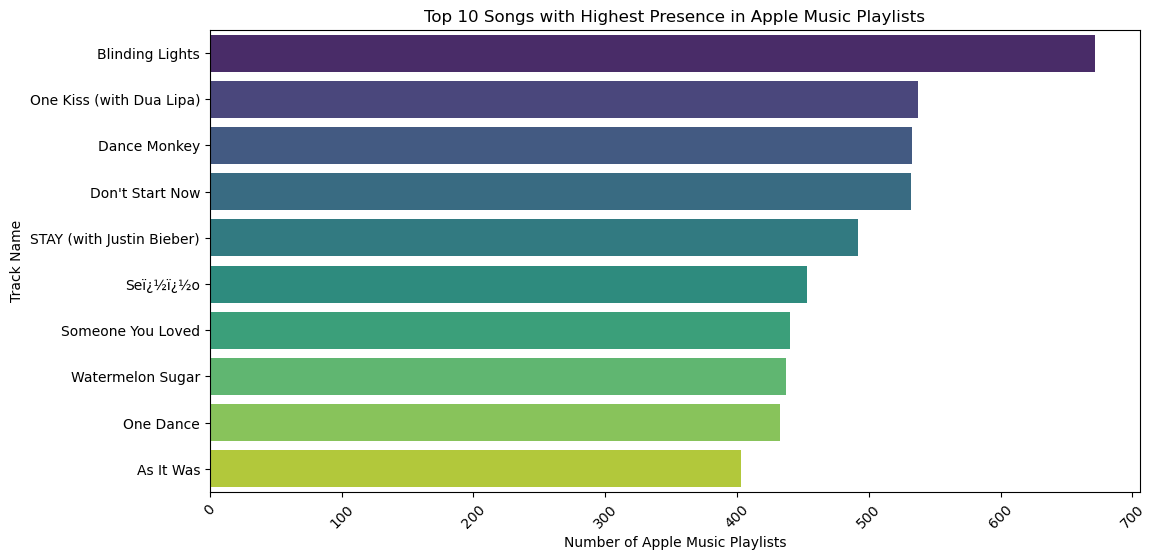

,track_name,artist(s)_name,in_apple_playlists
55,Blinding Lights,The Weeknd,672
403,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",537
620,Dance Monkey,Tones and I,533
407,Don't Start Now,Dua Lipa,532
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",492
693,Seï¿½ï¿½o,"Shawn Mendes, Camila Cabello",453
86,Someone You Loved,Lewis Capaldi,440
127,Watermelon Sugar,Harry Styles,437
162,One Dance,"Drake, WizKid, Kyla",433
14,As It Was,Harry Styles,403


In [10]:
# Top 10 songs with highest presence in Apple Music playlists
top_apple_playlists = data[['track_name', 'artist(s)_name', 'in_apple_playlists']].sort_values(by='in_apple_playlists', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_apple_playlists['in_apple_playlists'], y=top_apple_playlists['track_name'], palette='viridis')
plt.xlabel('Number of Apple Music Playlists')
plt.ylabel('Track Name')
plt.title('Top 10 Songs with Highest Presence in Apple Music Playlists')
plt.xticks(rotation=45)
plt.show()

top_apple_playlists


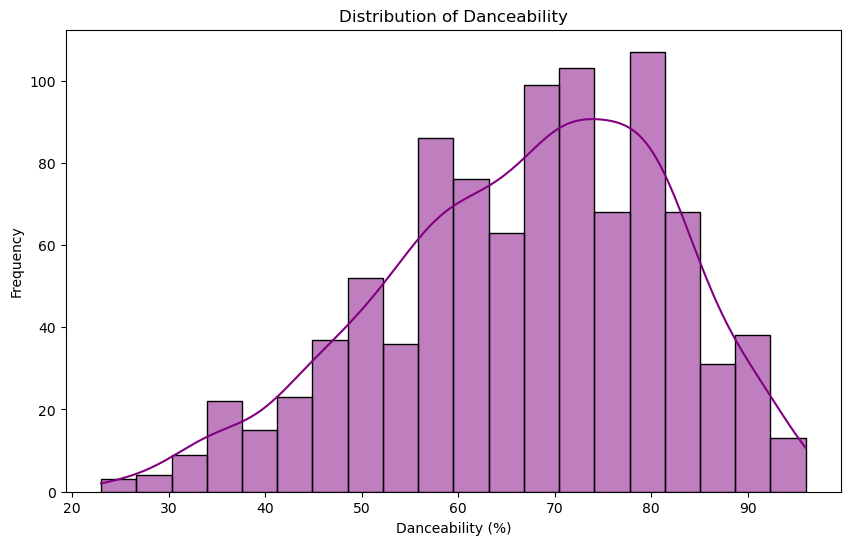

In [11]:
# Plot histogram for danceability
plt.figure(figsize=(10, 6))
sns.histplot(data['danceability_%'], bins=20, kde=True, color='purple')
plt.xlabel('Danceability (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability')
plt.show()


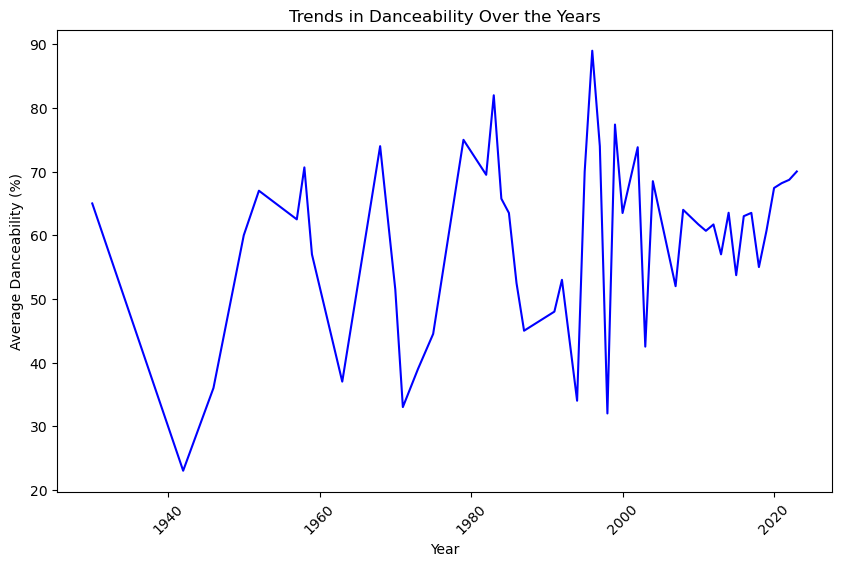

In [12]:
# Calculate average danceability for each year
average_danceability_by_year = data.groupby('released_year')['danceability_%'].mean()

# Plot trends in danceability over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_danceability_by_year.index, y=average_danceability_by_year.values, color='blue')
plt.xlabel('Year')
plt.ylabel('Average Danceability (%)')
plt.title('Trends in Danceability Over the Years')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_21/2199724258.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[cross_platform_columns].corr()


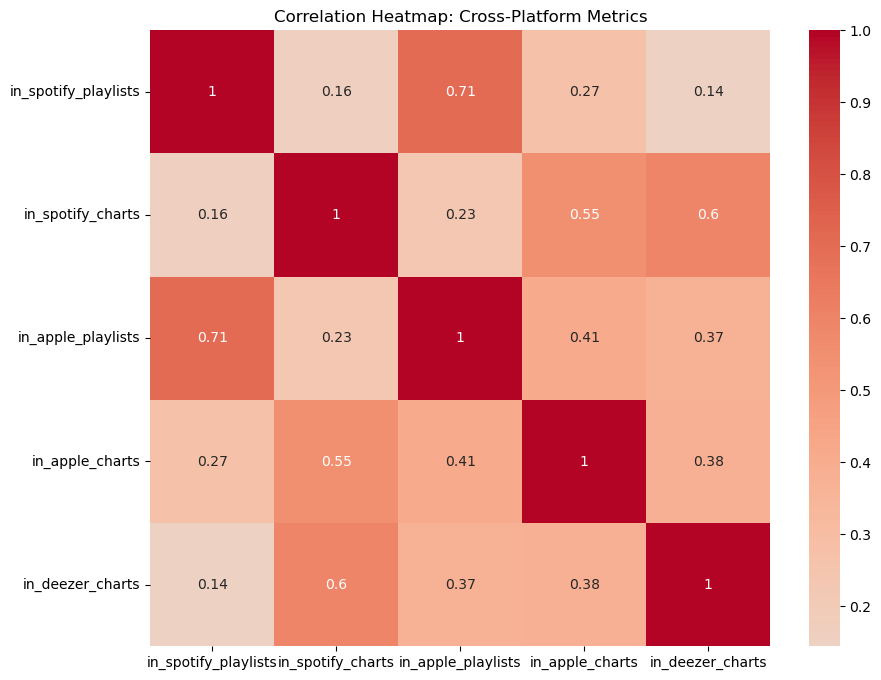

In [13]:
# Select columns for cross-platform metrics
cross_platform_columns = [
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 
    'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'
]

# Calculate the correlation matrix
correlation_matrix = data[cross_platform_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Cross-Platform Metrics')
plt.show()


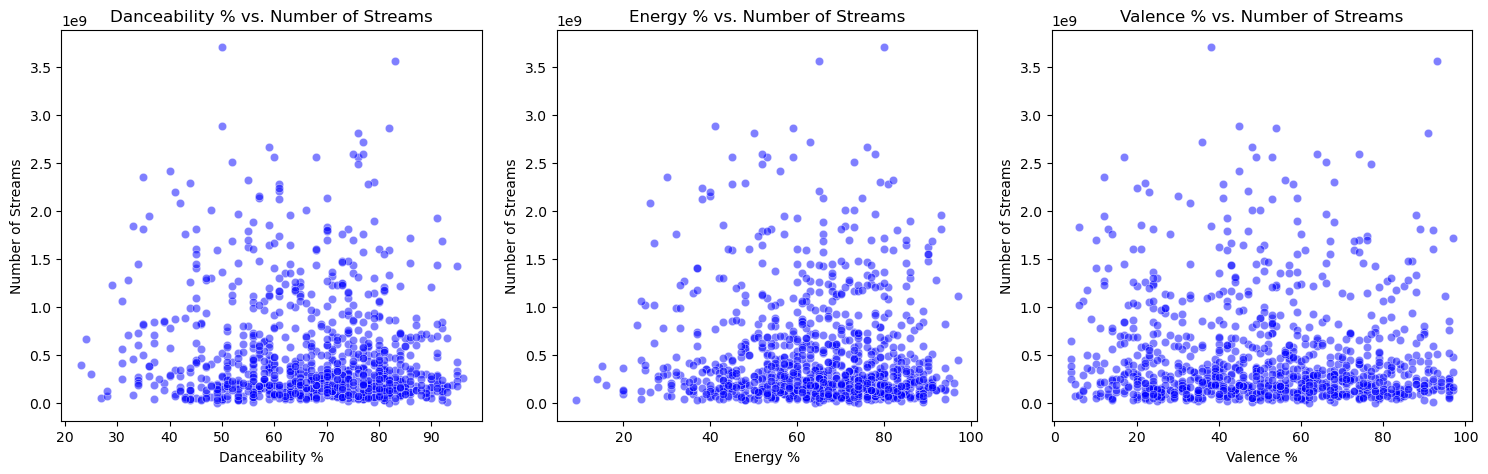

In [14]:
# Select columns for audio features and popularity
audio_features_columns = ['danceability_%', 'energy_%', 'valence_%']
popularity_column = 'streams'

# Create scatter plots
plt.figure(figsize=(15, 5))
for idx, feature in enumerate(audio_features_columns, start=1):
    plt.subplot(1, 3, idx)
    sns.scatterplot(x=data[feature], y=data[popularity_column], color='blue', alpha=0.5)
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Number of Streams')
    plt.title(f'{feature.replace("_", " ").title()} vs. Number of Streams')

plt.tight_layout()
plt.show()


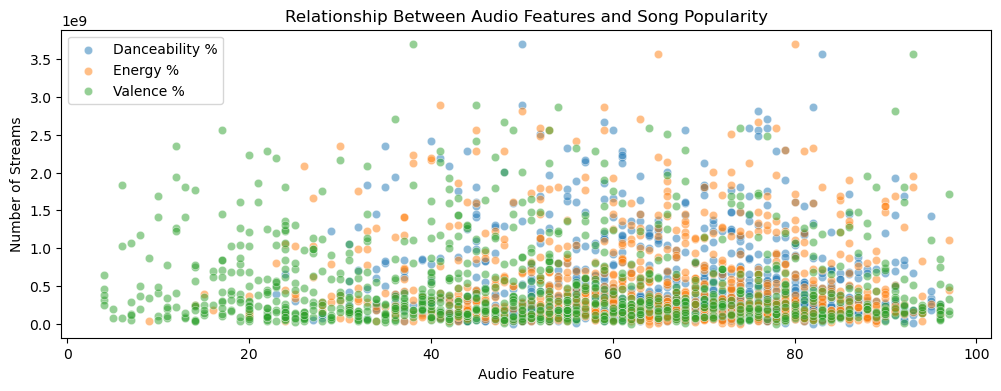

In [15]:
# Select columns for audio features and popularity
audio_features_columns = ['danceability_%', 'energy_%', 'valence_%']
popularity_column = 'streams'

# Create scatter plots
plt.figure(figsize=(12, 4))
for feature in audio_features_columns:
    sns.scatterplot(data=data, x=feature, y=popularity_column, alpha=0.5, label=feature.replace('_', ' ').title())

plt.xlabel('Audio Feature')
plt.ylabel('Number of Streams')
plt.title('Relationship Between Audio Features and Song Popularity')
plt.legend()
plt.show()


In [16]:
import plotly.express as px

# Select columns for audio features and popularity
audio_features_columns = ['danceability_%', 'energy_%', 'valence_%']
popularity_column = 'streams'

# Create an interactive scatter plot with dropdown menus
fig = px.scatter(data, x=popularity_column, y=popularity_column, color=audio_features_columns[0],
                 labels={'x': 'Number of Streams', 'y': 'Number of Streams'},
                 title='Relationship Between Audio Features and Song Popularity')

# Add dropdown menu for audio features
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {'method': 'relayout', 'label': feature.replace('_', ' ').title(), 'args': [{'yaxis.title.text': feature.replace('_', ' ').title()}]}
                for feature in audio_features_columns
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.15,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }
    ]
)

fig.show()


In [17]:
import plotly.express as px

# Create scatter plot for Popularity vs. Danceability
fig = px.scatter(data, x='danceability_%', y='streams', title='Popularity vs. Danceability')
fig.update_layout(xaxis_title='Danceability (%)', yaxis_title='Number of Streams')
fig.show()


In [18]:
import plotly.express as px

# Create box plot for Valence distribution by Year
fig = px.box(data, x='released_year', y='valence_%', title='Valence Distribution by Year')
fig.update_layout(xaxis_title='Year', yaxis_title='Valence (%)')
fig.show()


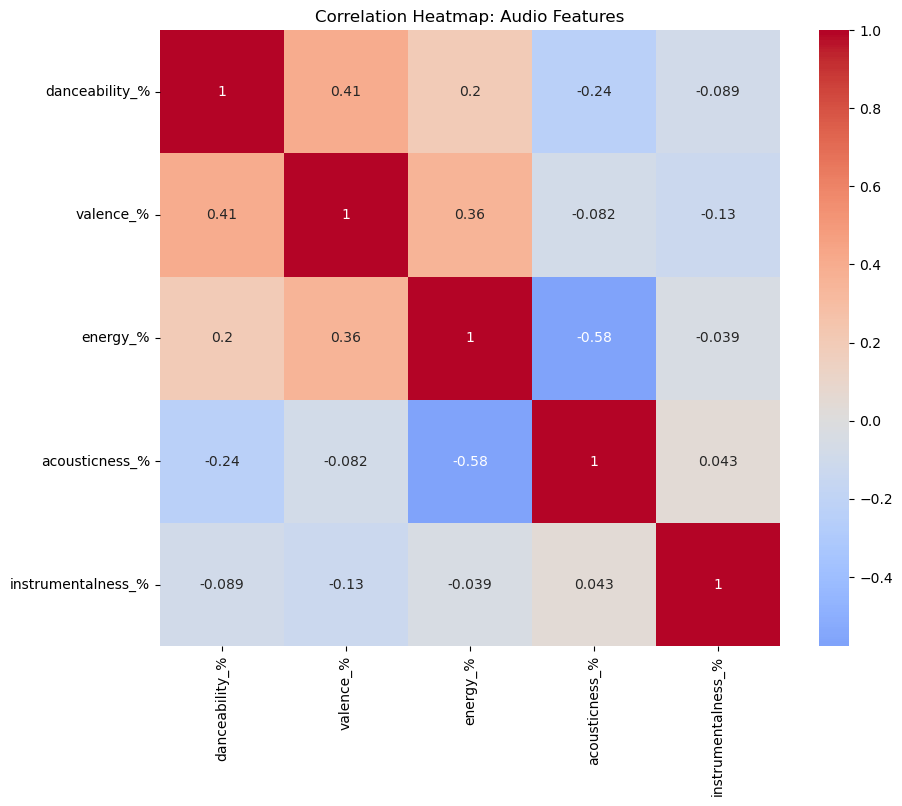

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for audio features
audio_features_columns = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%']

# Calculate the correlation matrix
correlation_matrix = data[audio_features_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Audio Features')
plt.show()


In [20]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [21]:
import plotly.express as px

# Create an interactive scatter plot with dropdown menu for Spotify
fig = px.scatter(data, x='danceability_%', y='streams', color='streams',
                 title='Danceability vs. Spotify Streams',
                 labels={'danceability_%': 'Danceability (%)', 'streams': 'Number of Streams'},
                 hover_name='track_name', template='plotly_dark')

# Add dropdown menu for artists
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {'method': 'relayout', 'label': artist, 'args': [{'yaxis.title.text': f'Number of Streams for {artist}'}]}
                for artist in data['artist(s)_name'].unique()
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.15,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }
    ]
)

# Show the interactive plot
fig.show()


In [22]:
import plotly.express as px

# Create an interactive scatter plot with dropdown menu for multiple audio features on Spotify
fig = px.scatter(data, x='danceability_%', y='streams', color='streams',
                 title='Audio Features vs. Spotify Streams',
                 labels={'danceability_%': 'Danceability (%)', 'streams': 'Number of Streams'},
                 hover_name='track_name', template='plotly_dark')

# Add dropdown menu for audio features
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {'method': 'relayout', 'label': feature.replace('_', ' ').title(), 'args': [{'xaxis.title.text': feature.replace('_', ' ').title()}]}
                for feature in data.select_dtypes(include=['float']).columns
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.15,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }
    ]
)

# Show the interactive plot
fig.show()
